<a href="https://colab.research.google.com/github/danielvieira95/Inteligencia_Artificial_2025/blob/main/aula_10_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Exemplo 3 - Classificando se uma máquina é defeituosa ou não


In [ ]:
! pip install pandas

In [ ]:
! pip install -q scikit-learn

In [ ]:
! pip install  -q seaborn

In [ ]:
! pip install -q matplotlib

In [ ]:
! pip install numpy

In [1]:
# importando as bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Criando a base de dados
data = pd.DataFrame({
    'Vibração':[3.2,4.0,3.7,5.5,6.2,2.1,2.8,1.9,7.3,6.8,
                2.4,5.9,4.5,2.6,4.8,3.4,6.1,2.0,5.0,7.0],
    'Corrente':[12.5,14.2,11.8,15.6,17.0,10.2,9.5,8.8,18.4,17.8,10.8,16.2,13.4,9.9,
                13.9,11.5,16.7,8.6,14.8,18],
    'Temperatura':[50.0,51.2,48.5,53.1,56.8,45.7,43.2,41.6,59.3,57.9,46.9,54.7,49.7,44.5,50.8,47.3,55.4,41.0,52.3,58.7],
    'Classe':['Não Defeituosa','Não Defeituosa','Não Defeituosa','Não Defeituosa','Não Defeituosa',
              'Defeituosa','Defeituosa','Defeituosa','Não Defeituosa','Não Defeituosa','Defeituosa',
              'Não Defeituosa','Não Defeituosa','Defeituosa','Não Defeituosa','Não Defeituosa','Não Defeituosa','Defeituosa',
              'Não Defeituosa','Não Defeituosa']


})

In [6]:
data.head()

,Vibração,Corrente,Temperatura,Classe
0,3.2,12.5,50.0,Não Defeituosa
1,4.0,14.2,51.2,Não Defeituosa
2,3.7,11.8,48.5,Não Defeituosa
3,5.5,15.6,53.1,Não Defeituosa
4,6.2,17.0,56.8,Não Defeituosa


In [8]:
# Separando os dados em X e y
X = data[['Vibração','Corrente','Temperatura']]
y = data['Classe']

In [ ]:
X

In [12]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train

In [14]:
# Criando o modelo de Machine Learning
modelo = SVC(kernel = 'linear')
modelo.fit(X_train,y_train)

SVC(kernel='linear')

In [15]:
y_prev = modelo.predict(X_test)

In [16]:
y_prev

array(['Não Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
       'Não Defeituosa', 'Defeituosa'], dtype=object)

In [17]:
# Calculo das métricas
acc = accuracy_score(y_test,y_prev)
cm = confusion_matrix(y_test,y_prev)

In [18]:
acc

1.0

In [19]:
cm

array([[2, 0],
       [0, 4]])

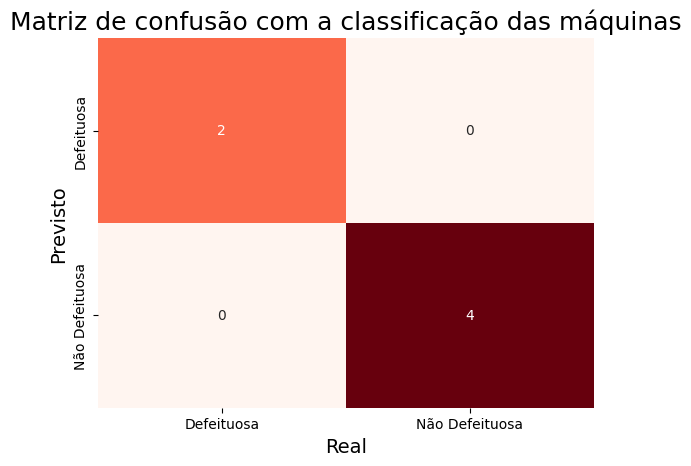

In [21]:
# Visualizando a matriz de confusão
sns.heatmap(cm,annot = True,cmap='Reds',cbar=False,
            xticklabels=['Defeituosa','Não Defeituosa'],yticklabels=['Defeituosa','Não Defeituosa'])
plt.title('Matriz de confusão com a classificação das máquinas',fontsize = 18)
plt.xlabel('Real',fontsize = 14)
plt.ylabel('Previsto',fontsize = 14)
plt.show()

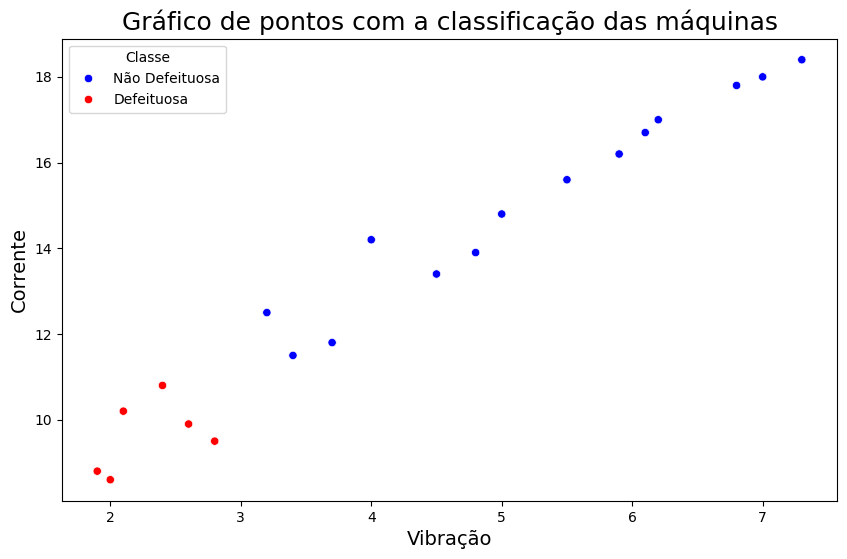

In [22]:
# Gráfico de pontos scatter plot
# Mapeando as cores com base na classe
pallete = {'Defeituosa':'red','Não Defeituosa':'blue'}
# Criando o scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Vibração',y='Corrente',hue='Classe',data = data,palette=pallete)
plt.title('Gráfico de pontos com a classificação das máquinas',fontsize = 18)
plt.xlabel('Vibração',fontsize = 14)
plt.ylabel('Corrente',fontsize = 14)
plt.show()